# Credit Card Fraud Detection

## 1.Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## 2.Reading data file

In [2]:
cc_data = pd.read_csv("creditcard data.csv")

In [3]:
cc_data.head(6)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0


In [4]:
cc_data.shape

(284807, 31)

In [5]:
cc_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## 3.Data visualization techniques

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

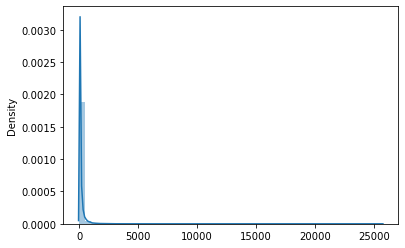

In [7]:
cc_amount = cc_data['Amount'].values
sns.distplot(cc_amount)

<AxesSubplot:xlabel='Time', ylabel='Count'>

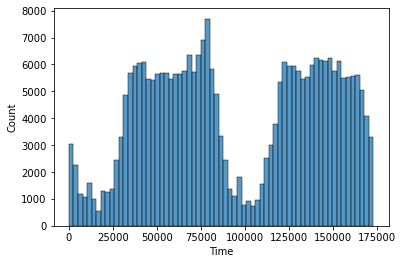

In [8]:
time = cc_data['Time']
sns.histplot(time)

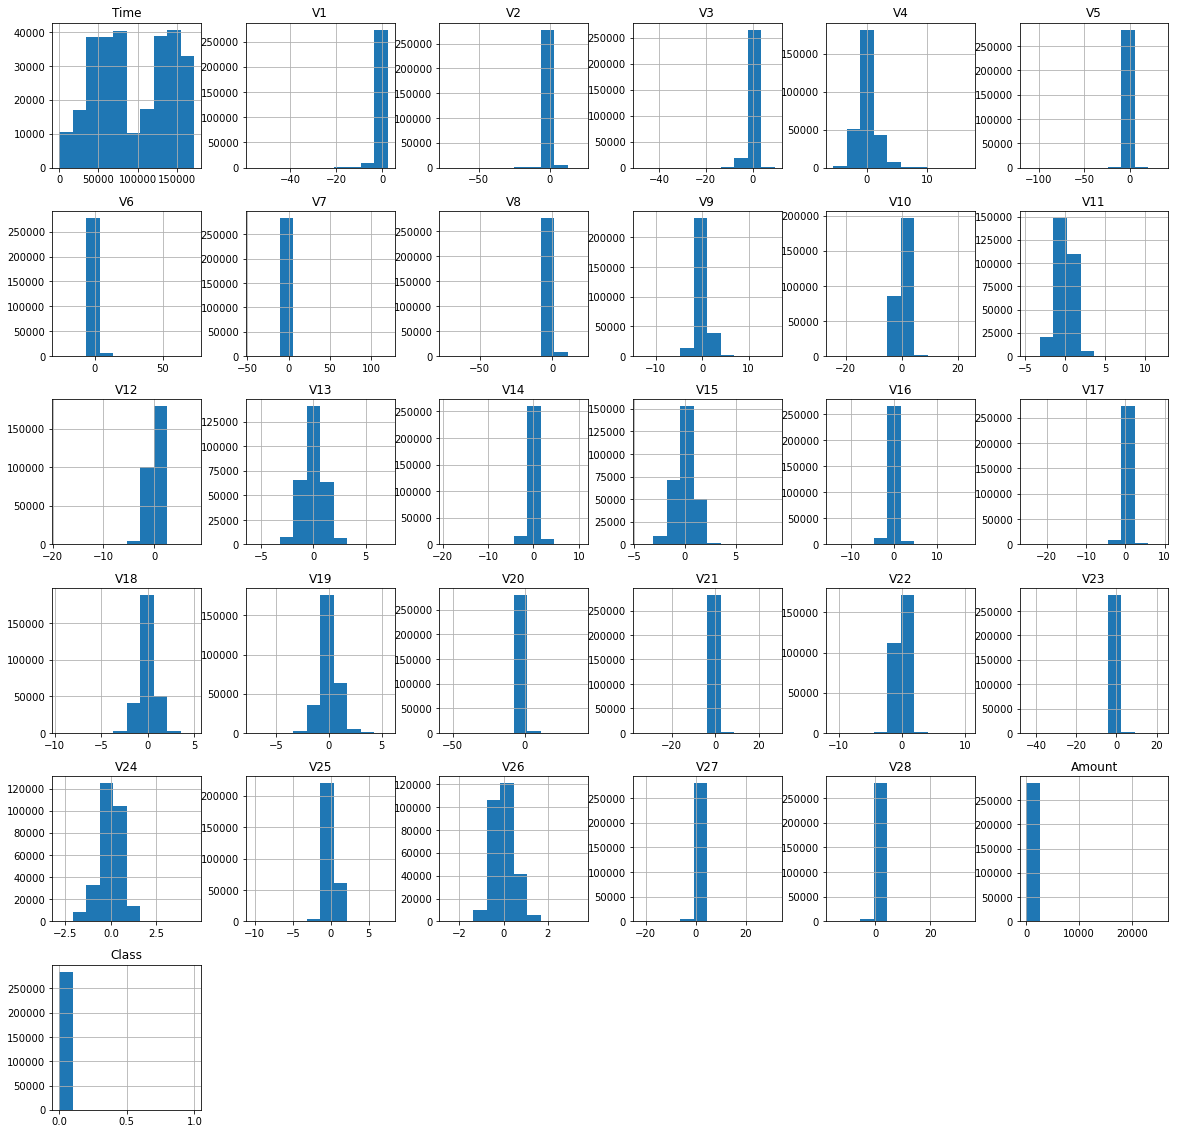

In [9]:
cc_data.hist(figsize = (20,20))
plt.show()

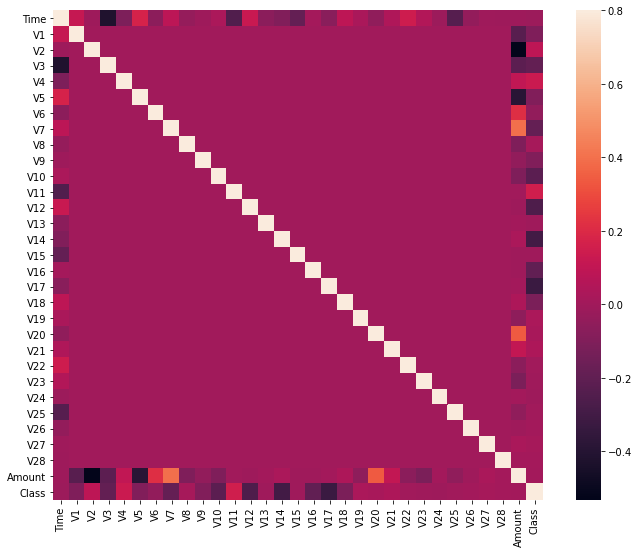

In [10]:
conf_mat = cc_data.corr()
fig = plt.figure(figsize = (12,9))
sns.heatmap(conf_mat, vmax=.8, square = True)
plt.show()

## 4.Data Preprocessing

In [11]:
cc_data['Amount'][0:5]

0    149.62
1      2.69
2    378.66
3    123.50
4     69.99
Name: Amount, dtype: float64

In [12]:
cc_data['nor_amount']=StandardScaler().fit_transform(cc_data['Amount'].values.reshape(-1,1))
cc_data = cc_data.drop(['Amount'],axis=1)

In [13]:
cc_data['nor_amount'][0:6]

0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
5   -0.338556
Name: nor_amount, dtype: float64

In [14]:
cc_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class',
       'nor_amount'],
      dtype='object')

## 5.Feature extraction

In [15]:
x=cc_data.drop(['Class'],axis=1)
y=cc_data[['Class']]

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(199364, 30)
(85443, 30)
(199364, 1)
(85443, 1)


## 6.Model evaluation

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [18]:
def random_forest_classifier(x_train, y_train, x_test, y_test):
    rf_classifier = RandomForestClassifier(n_estimators=50)
    rf_classifier.fit(x_train, y_train.values.ravel())
    acu_score = rf_classifier.score(x_test, y_test)
    print(f'Accuracy of model on test dataset = {acu_score}')
    y_prdt = rf_classifier.predict(x_test)
    print(f"Confusion Matrix : \n {confusion_matrix(y_test, y_prdt)}")
    print(f"Classification Report: \n {classification_report(y_test, y_prdt)}")
    
random_forest_classifier(x_train, y_train, x_test, y_test)

Accuracy of model on test dataset = 0.9995435553526912
Confusion Matrix : 
 [[85290     6]
 [   33   114]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.95      0.78      0.85       147

    accuracy                           1.00     85443
   macro avg       0.97      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [19]:
cls_val = cc_data['Class'].value_counts()
print(f"Number of samples for each class :\n{cls_val}")
non_fraud = cls_val[0]
fraud = cls_val[1]
print(f"Non Fraudulent Numbers : {non_fraud}")
print(f"Fraudulent Numbers : {fraud}")

Number of samples for each class :
0    284315
1       492
Name: Class, dtype: int64
Non Fraudulent Numbers : 284315
Fraudulent Numbers : 492


In [20]:
non_fraud_indexies = cc_data[cc_data.Class==0].index
fraud_indexies = np.array(cc_data[cc_data['Class']==1].index)
random_normal_indexies = np.random.choice(non_fraud_indexies, fraud, replace=False)
random_normal_indexies = np.array(random_normal_indexies)

un_sample_indexies = np.concatenate([fraud_indexies, random_normal_indexies])
un_sample_datas = cc_data.iloc[un_sample_indexies, :]

x_undersample_data = un_sample_datas.drop(['Class'], axis=1)
y_undersample_data = un_sample_datas[['Class']]

x_train_sample, x_test_sample, y_train_sample, y_test_sample = train_test_split(x_undersample_data, y_undersample_data, test_size = 0.2, random_state=0)

### Accuracy rate 

In [21]:
from sklearn.metrics import roc_auc_score

def random_forest_classifier(x_train, y_train, x_test, y_test):
    rf_classifier = RandomForestClassifier(n_estimators=50)
    rf_classifier.fit(x_train, y_train.values.ravel())
    auc_score = rf_classifier.score(x_test, y_test)
    print(f'Accuracy of model on test dataset = {auc_score}')
    y_prdt = rf_classifier.predict(x_test)
    print(f"Confusion Matrix : \n {confusion_matrix(y_test, y_prdt)}")
    print(f"Classification Report: \n {classification_report(y_test, y_prdt)}")
    print(f"AROC Score : \n {roc_auc_score(y_test, y_prdt)}")
    
random_forest_classifier(x_train_sample, y_train_sample, x_test_sample, y_test_sample)


Accuracy of model on test dataset = 0.9695431472081218
Confusion Matrix : 
 [[106   0]
 [  6  85]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       106
           1       1.00      0.93      0.97        91

    accuracy                           0.97       197
   macro avg       0.97      0.97      0.97       197
weighted avg       0.97      0.97      0.97       197

AROC Score : 
 0.967032967032967
